# Conducción de calor en 1D: <font color=green>caso estacionario</font>

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019**

*   Autores: 
    - Luis M. de la Cruz Salas
*   Rev: lun 15 feb 2021 15:24:53 CST

<img src="./Figuras/conceptualCOMPLETO.png" style="width: 300px;"/>

Estudiar la conducción de calor en una barra metálica en estado estacionario.

Propiedades de la barra
1. Longitud: 0.5 m
2. Conductividad térmica ($\kappa$): 1000 W / m K
3. Temperatura constante en el extremo izquierdo: 100 [$^o C$]
4. Temperatura constante en el extremo derecho: 500 [$^o C$]

<img src="./Figuras/matematicoCOMPLETO.png" style="width: 300px;"/>

El modelo matemático de este problema consiste de la siguiente ecuación diferencial parcial:

$
\displaystyle
\frac{\partial}{\partial x} \left(\kappa \frac{\partial T}{\partial x}\right) = 0
$

Con las siguientes **Condiciones de frontera** : $T(x=0) = TA \quad$ y $\quad T(x=L) = TB$, donde $TA = 100 ^o$C y $TB = 500 ^o$C

La solución de esta ecuación implica encontrar la temperatura $T$ en cualquier punto $x$ de la barra, es decir, la temperatura es una función de una variable $T(x)$.

Este problema tiene la siguiente solución analítica: $T(x) = 800 x + 100$

<img src="./Figuras/numericoCOMPLETO.png" style="width: 300px;"/>

Para obtener una solución aproximada a este problema usamos el método de volumen finito. Una excelente referencia a dicho método se puede encontrar en [1] y [2].

<img src="./Figuras/computacionalCOMPLETO.png" style="width: 450px;"/>

El software PyNoxtli implementa varios algoritmos del método de volumen finito, de tal manera que para resolver el problema planteado se pueden realizar los pasos siguientes:

In [1]:
#-----------------------------------------------------------
# Ruta absoluta de PyNoxtli
#
import os, sys
sys.path.insert(0, os.path.abspath('../../base'))
#-----------------------------------------------------------
#
# Módulos de numpy
#
import numpy as np
#
# Módulos necesarios de PyNoxtli
#
from geo.line import Line
from fvm.sDiffusion import sDiffusion1D
from fvm.pde import PDE
from utils.displayInfo import printInfo
import vis.flowix as flx

In [2]:
#
# Propiedades físicas y geométricas de la barra
#
longitud = 0.5 # [m]
TA = 100       # [°C] Temperatura en el extremo izquierdo
TB = 500       # [°C] Temperatura en el extremo derecho
k  = 1000      # [W/m.K] Conductividad térmica
N  = 6         # Número de nodos

In [3]:
#
# Definición del dominio y condiciones de frontera
#
barra = Line(longitud)
barra.boundaryConditions(dirichlet = {'LEFT':TA, 'RIGHT':TB})
#
# Creación de la malla 
#
malla     = barra.constructMesh(N) # Se construye la malla del dominio
ivx, _, _ = malla.bounds(bi = 1, ei = N-1) # Grados de libertad
nx        = malla.nx    # Número de nodos
nvx       = malla.vx    # Número de volúmenes (celdas)
delta     = malla.dx    # Tamaño de los volúmenes
#
# Arreglo para almacenar la solución
#
T = np.zeros(nvx+2) # Arreglo inicializado con ceros
T[0]  = TA          # Condición de frontera izquierda
T[-1] = TB          # Condición de frontera derecha

print(T)

[100.   0.   0.   0.   0.   0. 500.]


In [4]:
#
# Impresión de los datos del problema
#
printInfo(Longitud = longitud,
          Temperatura_A = TA,
          Temperatura_B = TB,
          Conductividad = k,
          Nodos = nx, 
          Volúmenes = nvx,
          Delta = delta)

.--------------------------------------------------------------------------------.
|              PyNoxtli : Ver. 0.2, LMCS-2020, [GNU GPL License V3]              |
.--------------------------------------------------------------------------------.
|       Longitud = 5.000000000000000e-01                                         |
|  Temperatura_A =    100                                                        |
|  Temperatura_B =    500                                                        |
|  Conductividad =    1000                                                       |
|          Nodos =     6                                                         |
|      Volúmenes =     5                                                         |
|          Delta = 1.000000000000000e-01                                         |
.--------------------------------------------------------------------------------.


In [5]:
#
# Definición de la fuente 
#
Su = np.zeros(ivx) # Por ahora no hay fuente
#
# Definición del esquema de disccretización
#
dif_scheme = sDiffusion1D(malla, Su, k)
#
# Definición de la ecuación a resolver
#
laplace = PDE(barra, T)
#
# Creación del sistema lineal y su solución
#
laplace.setNumericalScheme(dif_scheme)
laplace.solve()
print('Solución : {}'.format(T))

Solución : [100. 140. 220. 300. 380. 460. 500.]


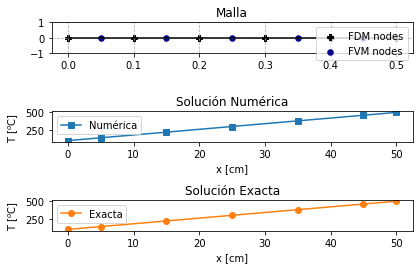

In [6]:
#
# Coordenadas de la malla para FVM
x, _, _ = malla.coordinatesMeshFVM() 
#
# Solución analítica
Ta = 800 * x + 100
#
# Visualización 
axis_par = [{'title':'Malla'},
            {'title':'Solución Numérica', 'xlabel':'x [cm]', 'ylabel':'T [$^o$C]'},
            {'title':'Solución Exacta', 'xlabel':'x [cm]', 'ylabel':'T [$^o$C]'}]

v = flx.Plotter(3,1,axis_par) # Son 3 renglones y una columna de ejes (Axes).
v.plot(2,x * 100,T, {'marker':'s', 'ls':'-', 'c':'C0', 'label':'Numérica'})
v.plot(3,x * 100,Ta, {'marker':'o', 'ls':'-', 'c':'C1', 'label':'Exacta'})
v.plot_mesh(1, malla, label=True)
v.legend()
v.show()

## Referencias
**[1]** *An Introduction to Computational Fluid Dynamics: The Finite Volume Method*,
Henk Kaarle Versteeg, Weeratunge Malalasekera, Pearson Education Limited, **2007**, ISBN 0131274988, 9780131274983.

**[2]** *Numerical Heat Transfer and Fluid Flow*, Suhas Patankar, CRC Press, **2018**, ISBN 1351991515, 9781351991513.